In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
df = pd.read_csv("/content/train.csv")
df.head()


Customer ID               Name Gender   Age  Income (USD) Income Stability  \
0     C-36995   Frederica Shealy      F  56.0       1933.05              Low   
1     C-33999  America Calderone      M  32.0       4952.91              Low   
2      C-3770      Rosetta Verne      F  65.0        988.19             High   
3     C-26480         Zoe Chitty      F  65.0           NaN             High   
4     C-23459       Afton Venema      F  31.0       2614.77              Low   

  Profession     Type of Employment    Location  Loan Amount Request (USD)  \
0    Working            Sales staff  Semi-Urban                   72809.58   
1    Working                    NaN  Semi-Urban                   46837.47   
2  Pensioner                    NaN  Semi-Urban                   45593.04   
3  Pensioner                    NaN       Rural                   80057.92   
4    Working  High skill tech staff  Semi-Urban                  113858.89   

   ...  Credit Score No. of Defaults Has Active Credit Card  Property ID  \
0  ...        809.44             0.0                    NaN        746.0   
1  ...        780.40             0.0            Unpossessed        608.0   
2  ...        833.15             0.0            Unpossessed        546.0   
3  ...        832.70             1.0            Unpossessed        890.0   
4  ...        745.55             1.0                 Active        715.0   

   Property Age  Property Type Property Location  Co-Applicant  \
0       1933.05            4.0             Rural           1.0   
1       4952.91            2.0             Rural           1.0   
2        988.19            2.0             Urban           0.0   
3           NaN            2.0        Semi-Urban           1.0   
4       2614.77            4.0        Semi-Urban           1.0   

   Property Price  Loan Sanction Amount (USD)  
0       119933.46                    54607.18  
1        54791.00                    37469.98  
2        72440.58                    36474.43  
3       121441.51                    56040.54  
4       208567.91                    74008.28  

[5 rows x 24 columns]

In [2]:
df.describe()

Age   Income (USD)  Loan Amount Request (USD)  \
count  7011.000000    5955.000000                7011.000000   
mean     40.046926    2573.951751               89333.688932   
std      16.121143    2079.008777               60336.131245   
min      18.000000     437.630000                6174.700000   
25%      25.000000    1640.085000               41192.540000   
50%      40.000000    2239.560000               75302.370000   
75%      55.000000    3110.845000              121166.030000   
max      65.000000  122966.280000              621497.820000   

       Current Loan Expenses (USD)   Dependents  Credit Score  \
count                  6988.000000  6428.000000   6600.000000   
mean                    403.348430     2.272402    739.611486   
std                     247.077733     0.957151     72.066177   
min                    -999.000000     1.000000    580.000000   
25%                     248.667500     2.000000    680.687500   
50%                     375.295000     2.000000    738.865000   
75%                     525.627500     3.000000    799.067500   
max                    3025.400000     8.000000    896.260000   

       No. of Defaults  Property ID   Property Age  Property Type  \
count      7011.000000  7011.000000    5881.000000    7011.000000   
mean          0.205106   498.743403    2575.670102       2.470546   
std           0.403808   287.368325    2086.395083       1.125167   
min           0.000000     1.000000     437.630000       1.000000   
25%           0.000000   250.000000    1640.880000       1.000000   
50%           0.000000   492.000000    2242.310000       2.000000   
75%           0.000000   746.500000    3113.040000       3.000000   
max           1.000000   999.000000  122966.280000       4.000000   

       Co-Applicant  Property Price  Loan Sanction Amount (USD)  
count   7011.000000    7.011000e+03                 6929.000000  
mean      -4.273285    1.329178e+05                47798.331909  
std       71.469208    9.531971e+04                48541.737885  
min     -999.000000   -9.990000e+02                 -999.000000  
25%        1.000000    6.109665e+04                    0.000000  
50%        1.000000    1.105831e+05                35031.220000  
75%        1.000000    1.809076e+05                74782.810000  
max        1.000000    1.077967e+06               395368.740000

In [3]:
df.isnull().sum()

Customer ID                       0
Name                              1
Gender                           11
Age                               1
Income (USD)                   1057
Income Stability                398
Profession                        1
Type of Employment             1634
Location                          1
Loan Amount Request (USD)         1
Current Loan Expenses (USD)      24
Expense Type 1                    1
Expense Type 2                    1
Dependents                      584
Credit Score                    412
No. of Defaults                   1
Has Active Credit Card          363
Property ID                       1
Property Age                   1131
Property Type                     1
Property Location                89
Co-Applicant                      1
Property Price                    1
Loan Sanction Amount (USD)       83
dtype: int64

In [4]:
df["Gender"]=df["Gender"].fillna(df["Gender"].mode()[0])
df["Income (USD)"]=df["Income (USD)"].fillna(df["Income (USD)"].mean())
df["Income Stability"]=df["Income Stability"].fillna(df["Income Stability"].mode()[0])
df["Type of Employment"]=df["Type of Employment"].fillna("unknown")
df["Current Loan Expenses (USD)"]=df["Current Loan Expenses (USD)"].fillna(df["Income (USD)"].mean())
df["Dependents"]=df["Dependents"].fillna(df["Dependents"].mean())
df["Credit Score"]=df["Credit Score"].fillna(df["Credit Score"].mean())
df["Has Active Credit Card"]=df["Has Active Credit Card"].fillna(df["Has Active Credit Card"].mode()[0])
df["Property Age"]=df["Property Age"].fillna(df["Property Age"].mean())
df["Property Location"]=df["Property Location"].fillna(df["Property Location"].mode()[0])

df.dropna(subset=["Loan Sanction Amount (USD)"], inplace=True)


In [5]:
df.isnull().sum()

Customer ID                    0
Name                           0
Gender                         0
Age                            0
Income (USD)                   0
Income Stability               0
Profession                     0
Type of Employment             0
Location                       0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Expense Type 1                 0
Expense Type 2                 0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property ID                    0
Property Age                   0
Property Type                  0
Property Location              0
Co-Applicant                   0
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df.drop(columns=["Customer ID", "Name", "Property ID","Type of Employment","Profession"], inplace=True)




In [7]:
# Gender: M -> 1, F -> 0
df["Gender"] = df["Gender"].map({"M": 1, "F": 0})

# Expense Type 1: Y -> 1, N -> 0
df["Expense Type 1"] = df["Expense Type 1"].map({"Y": 1, "N": 0})
df["Expense Type 2"] = df["Expense Type 2"].map({"Y": 1, "N": 0})
# Has Active Credit Card: Active → 1, Inactive → 0, Unpossessed → -1
df["Has Active Credit Card"] = df["Has Active Credit Card"].map({
    "Active": 1,
    "Inactive": 0,
    "Unpossessed": -1
})

# Income Stability: Low → 0, High → 1
df["Income Stability"] = df["Income Stability"].map({
    "Low": 0,
    "High": 1
})

# Property Location: Rural → 0, Semi-Urban → 1, Urban → 2
df["Property Location"] = df["Property Location"].map({
    "Rural": 0,
    "Semi-Urban": 1,
    "Urban": 2
})

# Location (same mapping as Property Location if same values)
df["Location"] = df["Location"].map({
    "Rural": 0,
    "Semi-Urban": 1,
    "Urban": 2
})





In [8]:
df

Gender   Age  Income (USD)  Income Stability  Location  \
0          0  56.0   1933.050000                 0         1   
1          1  32.0   4952.910000                 0         1   
2          0  65.0    988.190000                 1         1   
3          0  65.0   2573.951751                 1         0   
4          0  31.0   2614.770000                 0         1   
...      ...   ...           ...               ...       ...   
7006       1  58.0   2573.951751                 0         2   
7007       1  39.0   2573.951751                 0         0   
7008       1  18.0   5836.370000                 0         1   
7009       0  57.0   2573.951751                 0         1   
7010       0  34.0   2573.951751                 0         0   

      Loan Amount Request (USD)  Current Loan Expenses (USD)  Expense Type 1  \
0                      72809.58                       241.08               0   
1                      46837.47                       495.81               0   
2                      45593.04                       171.95               0   
3                      80057.92                       298.54               0   
4                     113858.89                       491.41               0   
...                         ...                          ...             ...   
7006                  391824.62                       959.31               1   
7007                  168953.80                       481.15               1   
7008                  282658.66                      1188.51               0   
7009                  246512.86                       601.09               0   
7010                   28213.63                       133.93               0   

      Expense Type 2  Dependents  Credit Score  No. of Defaults  \
0                  0    3.000000        809.44              0.0   
1                  1    1.000000        780.40              0.0   
2                  1    1.000000        833.15              0.0   
3                  1    2.000000        832.70              1.0   
4                  1    2.272402        745.55              1.0   
...              ...         ...           ...              ...   
7006               1    2.000000        817.64              0.0   
7007               1    2.000000        854.09              0.0   
7008               1    1.000000        761.75              0.0   
7009               1    2.272402        843.32              1.0   
7010               0    1.000000        641.59              0.0   

      Has Active Credit Card  Property Age  Property Type  Property Location  \
0                          1   1933.050000            4.0                  0   
1                         -1   4952.910000            2.0                  0   
2                         -1    988.190000            2.0                  2   
3                         -1   2575.670102            2.0                  1   
4                          1   2614.770000            4.0                  1   
...                      ...           ...            ...                ...   
7006                      -1   2575.670102            2.0                  0   
7007                       0   2575.670102            4.0                  1   
7008                      -1   5836.370000            2.0                  0   
7009                       1   2575.670102            4.0                  0   
7010                       0   2575.670102            2.0                  0   

      Co-Applicant  Property Price  Loan Sanction Amount (USD)  
0              1.0       119933.46                    54607.18  
1              1.0        54791.00                    37469.98  
2              0.0        72440.58                    36474.43  
3              1.0       121441.51                    56040.54  
4              1.0       208567.91                    74008.28  
...            ...             ...                         ...  
7006           1.0       680125.07                   27

In [9]:
df.isnull().sum()

Gender                         0
Age                            0
Income (USD)                   0
Income Stability               0
Location                       0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Expense Type 1                 0
Expense Type 2                 0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property Age                   0
Property Type                  0
Property Location              0
Co-Applicant                   0
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

In [10]:
x=df.drop('Loan Sanction Amount (USD)',axis=1)
y=df["Loan Sanction Amount (USD)"]
y

0        54607.18
1        37469.98
2        36474.43
3        56040.54
4        74008.28
          ...    
7006    274277.23
7007    118267.66
7008    211994.00
7009    197210.29
7010         0.00
Name: Loan Sanction Amount (USD), Length: 6929, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)





In [12]:
from sklearn.impute import SimpleImputer

# Create an imputer object
imputer = SimpleImputer(strategy="mean")  # or "median", "most_frequent"

# Fit on training data and transform both train and test
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)


In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [14]:
from sklearn.metrics import mean_squared_error,r2_score
r2_error=r2_score(y_test,y_pred)
print(r2_error)

0.5534437016754887


In [15]:
print(df.columns)

Index(['Gender', 'Age', 'Income (USD)', 'Income Stability', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property Age',
       'Property Type', 'Property Location', 'Co-Applicant', 'Property Price',
       'Loan Sanction Amount (USD)'],
      dtype='object')


Fold 1: MSE = 1056870408.05, R2 = 0.54, RMSE = 32509.54
Fold 2: MSE = 939663491.23, R2 = 0.61, RMSE = 30653.93
Fold 3: MSE = 1006230327.76, R2 = 0.60, RMSE = 31721.13
Fold 4: MSE = 961161090.48, R2 = 0.58, RMSE = 31002.60
Fold 5: MSE = 1120332939.49, R2 = 0.51, RMSE = 33471.37

Average MSE: 1016851651.40
Average R2: 0.57
Average RMSE: 31871.72


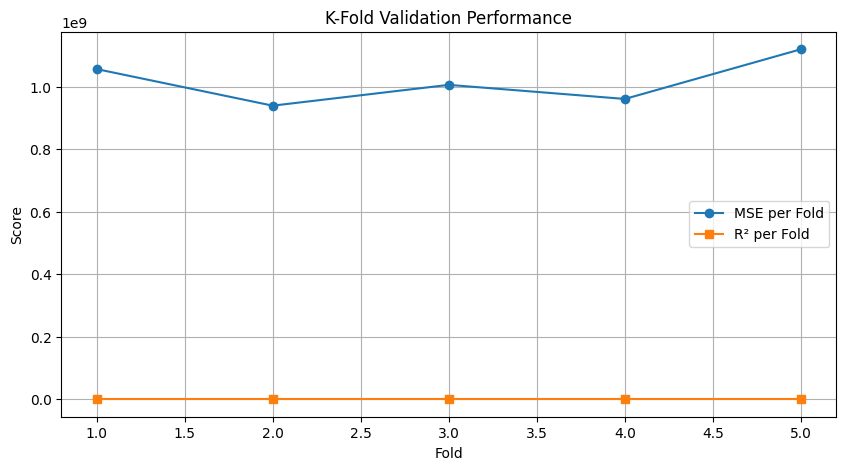

In [16]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Assuming x and y are defined as DataFrame/Series
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
model = LinearRegression()

mse_list = []
r2_list = []
rmse=[]

for fold, (train_idx, test_idx) in enumerate(kf.split(x), 1):
    X_train, X_test = x.iloc[train_idx], x.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Standardize
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train
    model.fit(X_train_scaled, y_train)

    # Predict and evaluate
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rms=np.sqrt(mse)
    mse_list.append(mse)
    r2_list.append(r2)
    rmse.append(rms)

    print(f"Fold {fold}: MSE = {mse:.2f}, R2 = {r2:.2f}, RMSE = {rms:.2f}")

# 4. Overall Performance
print(f"\nAverage MSE: {np.mean(mse_list):.2f}")
print(f"Average R2: {np.mean(r2_list):.2f}")
print(f"Average RMSE: {np.mean(rmse):.2f}")
# 5. Visualization
plt.figure(figsize=(10, 5))
plt.plot(range(1, k+1), mse_list, marker='o', label='MSE per Fold')
plt.plot(range(1, k+1), r2_list, marker='s', label='R² per Fold')
plt.title("K-Fold Validation Performance")
plt.xlabel("Fold")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipython-input-17-3531665815.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


<Figure size 1200x600 with 0 Axes>

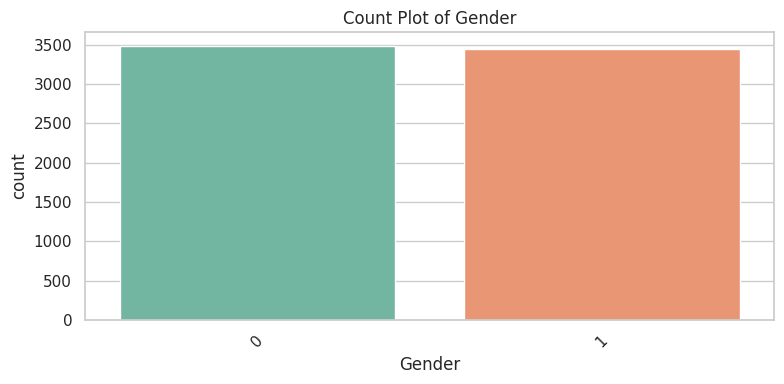

/tmp/ipython-input-17-3531665815.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


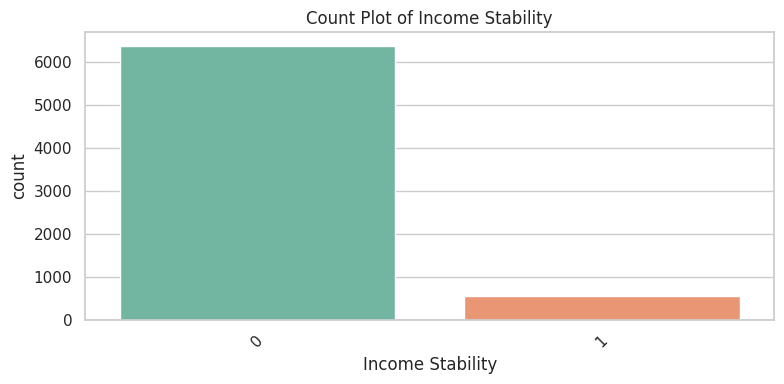

/tmp/ipython-input-17-3531665815.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


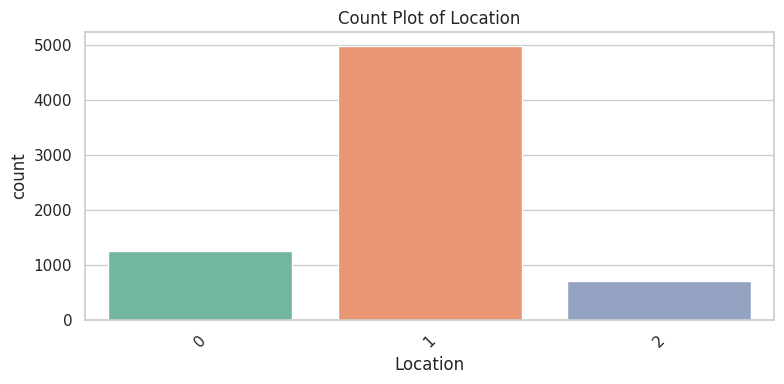

/tmp/ipython-input-17-3531665815.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


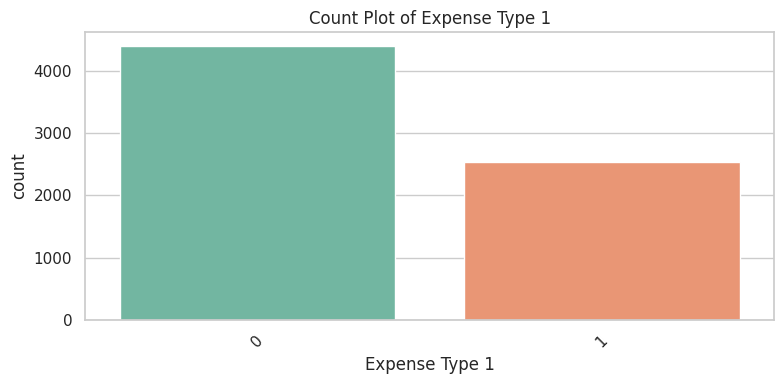

/tmp/ipython-input-17-3531665815.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


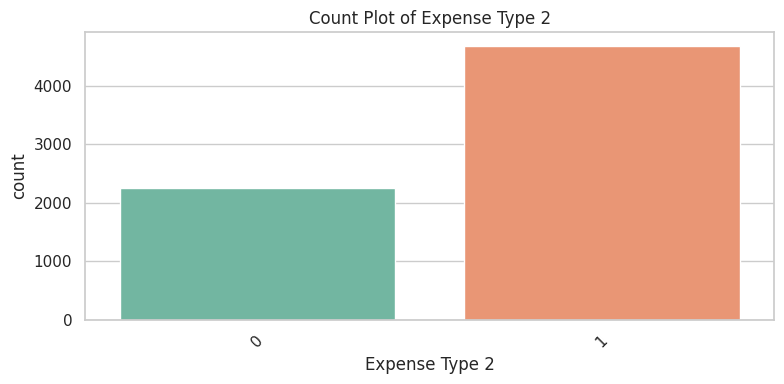

/tmp/ipython-input-17-3531665815.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


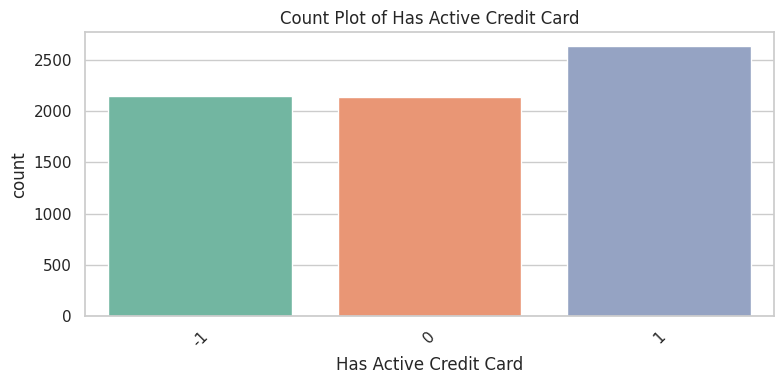

/tmp/ipython-input-17-3531665815.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


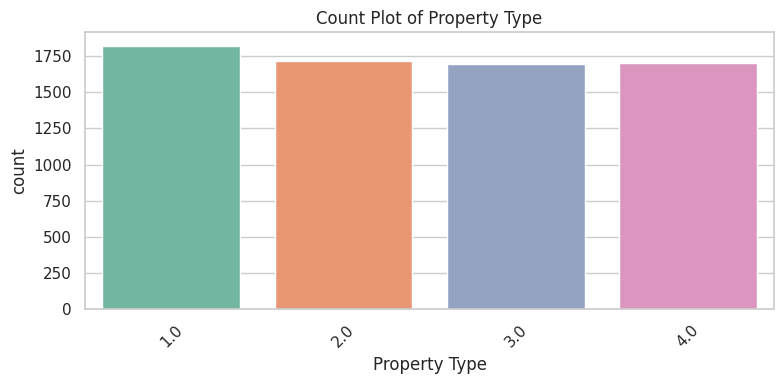

/tmp/ipython-input-17-3531665815.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


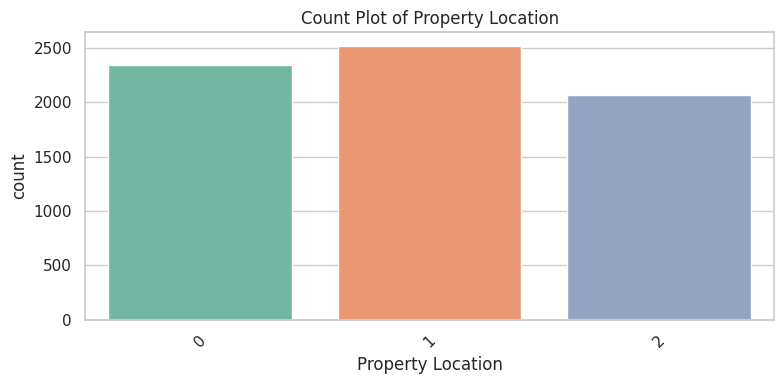

/tmp/ipython-input-17-3531665815.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


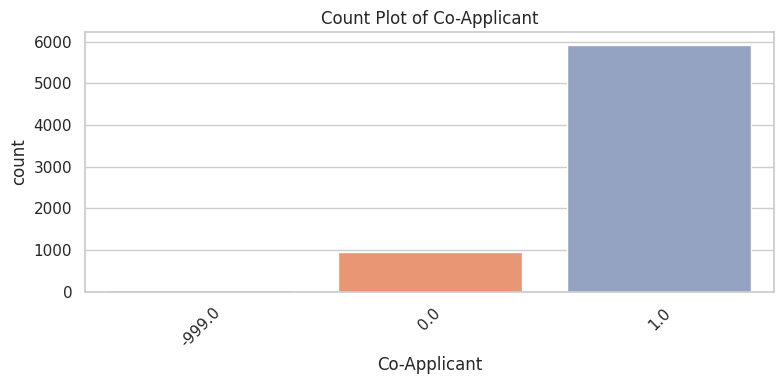

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# ----------------------------
# 1. Count Plots for Categorical Columns
# ----------------------------
categorical_cols = ['Gender', 'Income Stability', 'Location', 'Expense Type 1', 'Expense Type 2',
                    'Has Active Credit Card', 'Property Type', 'Property Location', 'Co-Applicant']

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, palette="Set2")
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


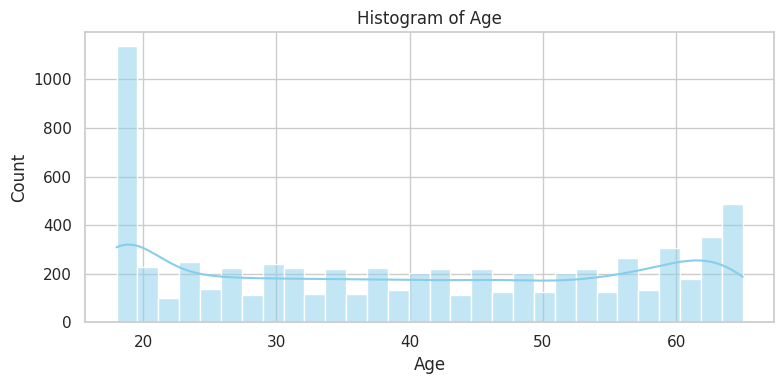

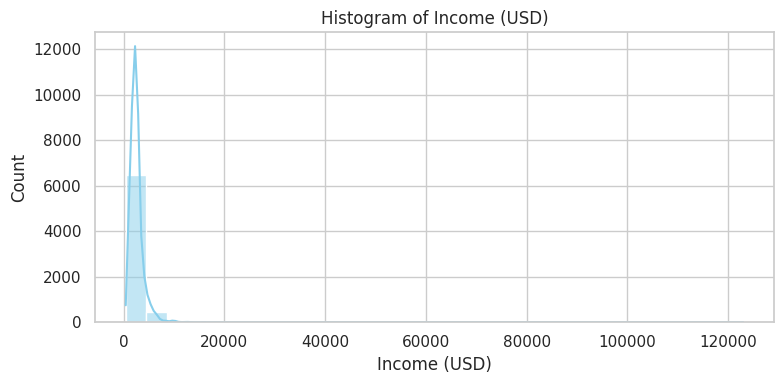

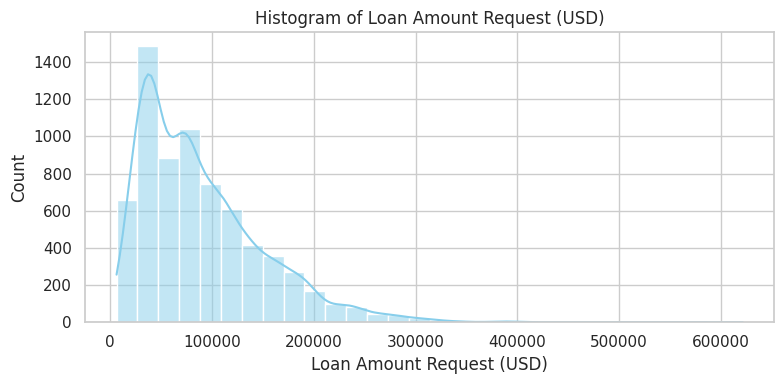

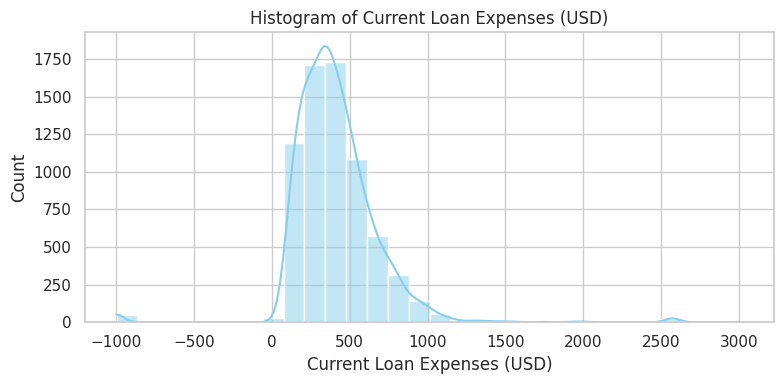

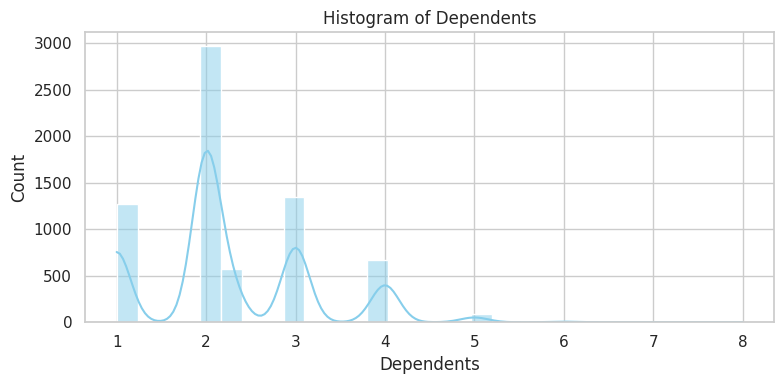

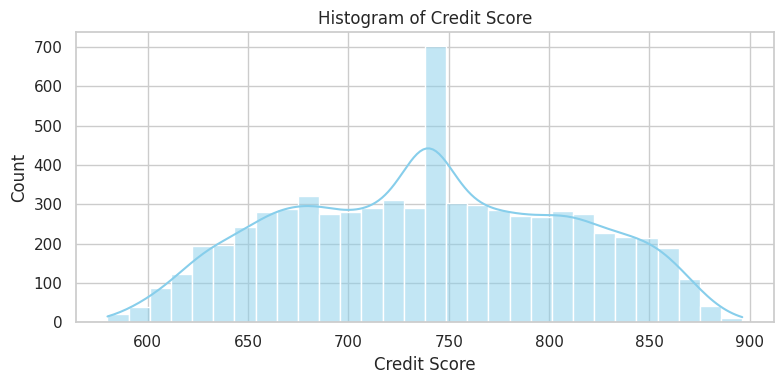

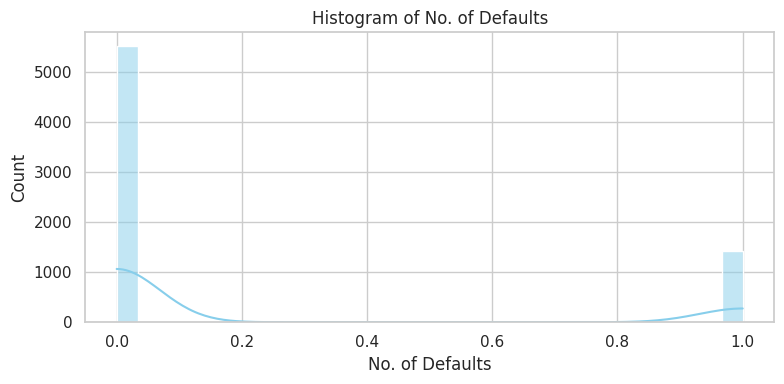

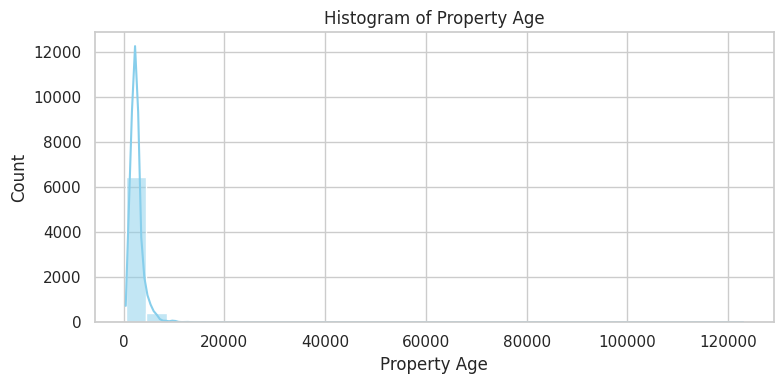

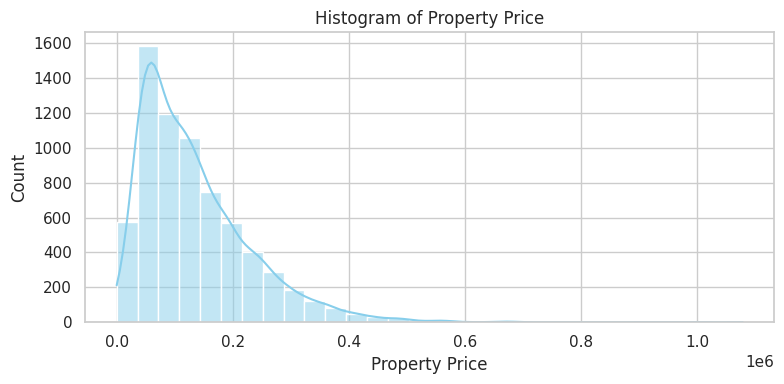

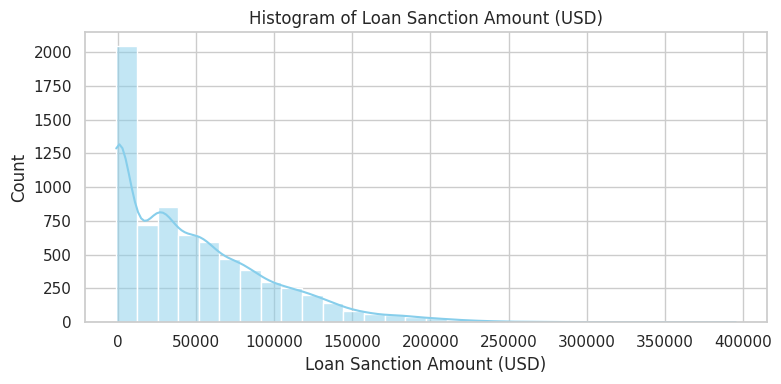

In [18]:
numerical_cols = ['Age', 'Income (USD)', 'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
                  'Dependents', 'Credit Score', 'No. of Defaults', 'Property Age',
                  'Property Price', 'Loan Sanction Amount (USD)']

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color="skyblue")
    plt.title(f"Histogram of {col}")
    plt.tight_layout()
    plt.show()

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load your dataset
#df = pd.read_csv('your_dataset.csv')  # Replace with your file

# Define target and features
target = 'Loan Sanction Amount (USD)'
numerical_cols = ['Age', 'Income (USD)', 'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
                  'Dependents', 'Credit Score', 'No. of Defaults', 'Property Age',
                  'Property Price']
categorical_cols = ['Gender', 'Income Stability', 'Location', 'Expense Type 1', 'Expense Type 2',
                    'Has Active Credit Card', 'Property Type', 'Property Location', 'Co-Applicant']


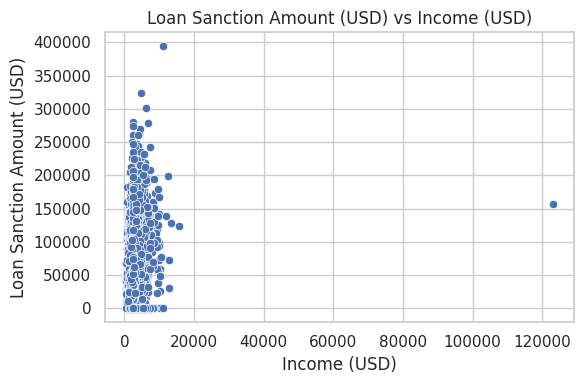

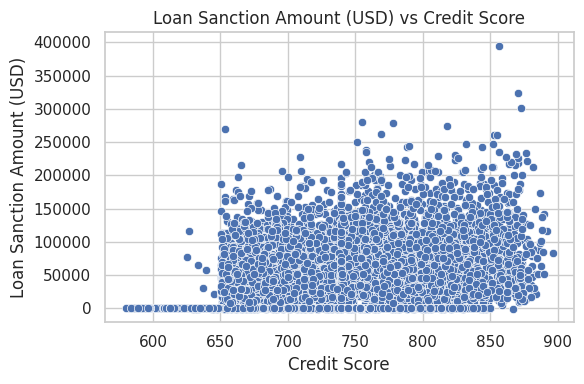

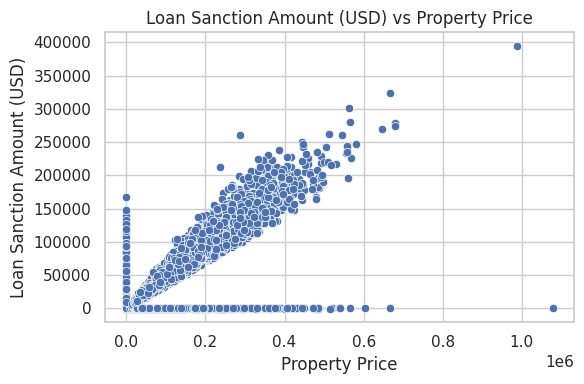

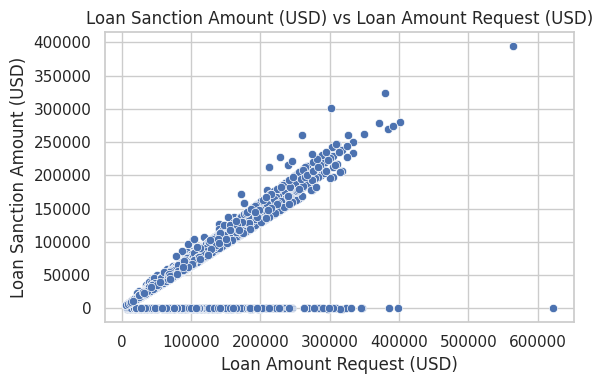

In [20]:
# 1. Scatter Plots
# -------------------------------
for col in ['Income (USD)', 'Credit Score', 'Property Price', 'Loan Amount Request (USD)']:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=col, y=target, data=df)
    plt.title(f"{target} vs {col}")
    plt.tight_layout()
    plt.show()


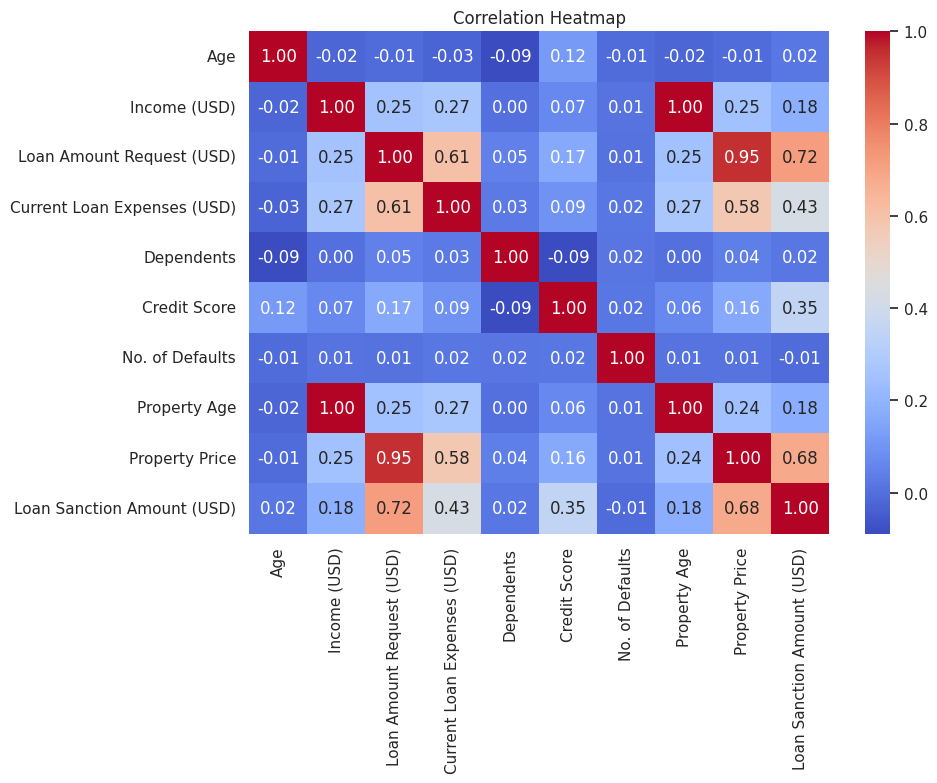

In [21]:
# 2. Correlation Heatmap
# -------------------------------
plt.figure(figsize=(10, 8))
corr = df[numerical_cols + [target]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

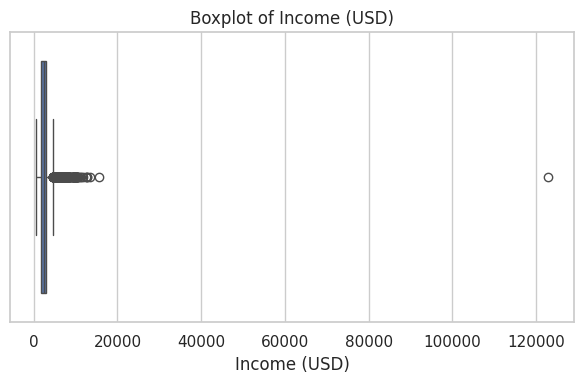

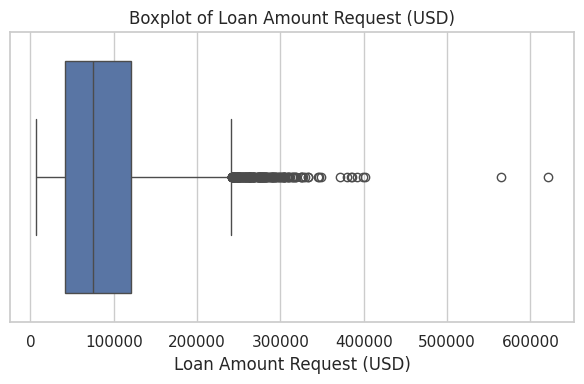

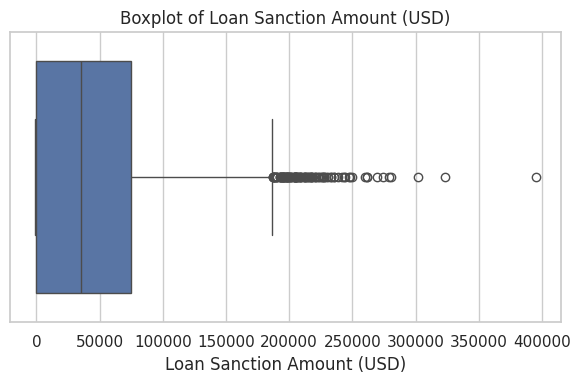

In [22]:
# 3. Boxplots for Outlier Detection
# -------------------------------
for col in ['Income (USD)', 'Loan Amount Request (USD)', target]:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

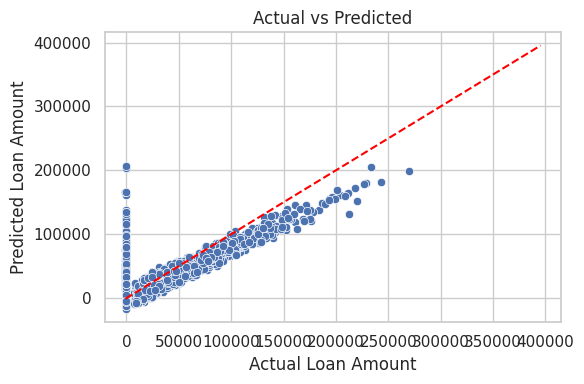

In [23]:
# 6. Actual vs Predicted Plot
# -------------------------------
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Loan Amount")
plt.ylabel("Predicted Loan Amount")
plt.title("Actual vs Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.tight_layout()
plt.show()

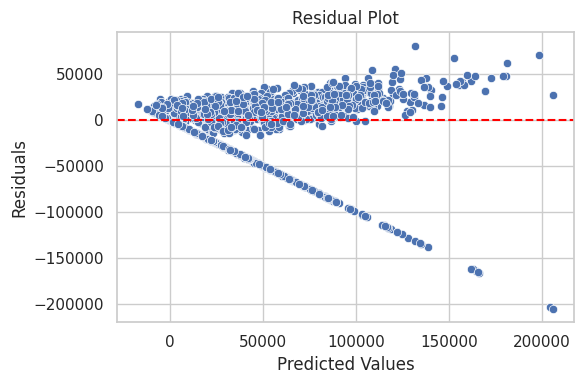

In [24]:
# 7. Residual Plot
residuals = y_test - y_pred
# -------------------------------
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.tight_layout()
plt.show()

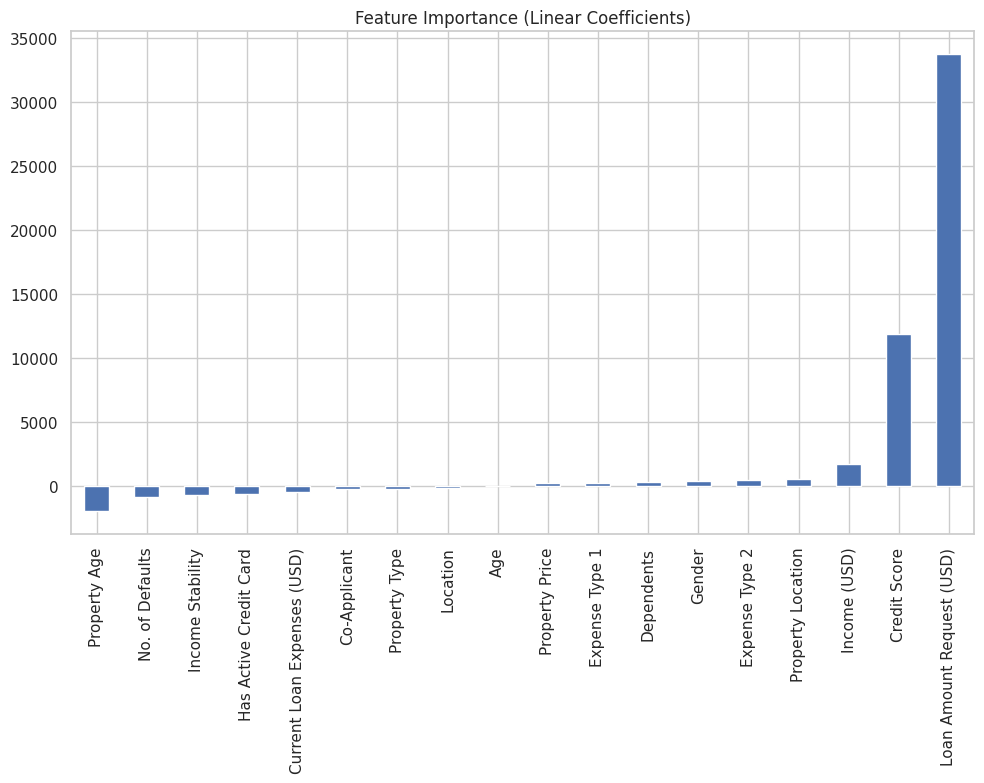

In [25]:
# 8. Feature Coefficients Bar Plot
# -------------------------------
coefficients = pd.Series(model.coef_, index=x.columns).sort_values()
plt.figure(figsize=(10, 8))
coefficients.plot(kind='bar')
plt.title("Feature Importance (Linear Coefficients)")
plt.tight_layout()
plt.show()



In [26]:
# -------------------------------
# 9. Print Model Performance
# -------------------------------
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.5062070275593691
RMSE: 33471.37492679663
